In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E28K,Snohomish,Mukilteo,WA,98275.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,21.0,236424583,POINT (-122.29943 47.912654),PUGET SOUND ENERGY INC,5.306104e+10
1,1C4JJXP68P,Yakima,Yakima,WA,98901.0,2023,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21,0,15.0,249905295,POINT (-120.4688751 46.6046178),PACIFICORP,5.307700e+10
2,WBY8P6C05L,Kitsap,Kingston,WA,98346.0,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,23.0,260917289,POINT (-122.5178351 47.7981436),PUGET SOUND ENERGY INC,5.303509e+10
3,JTDKARFP1J,Kitsap,Port Orchard,WA,98367.0,2018,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,26.0,186410087,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
4,5UXTA6C09N,Snohomish,Everett,WA,98208.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,44.0,186076915,POINT (-122.2032349 47.8956271),PUGET SOUND ENERGY INC,5.306104e+10


In [5]:
#########################################################
print(df.shape[0])
## rank the cities by the number of electric vehicles that are registered in that city?

# gk = df.groupby('City')['Electric Vehicle Type'].sum()

# the above did not work, it does not return the number of vehicle, because the column of Electric Vehicle is string not digit using count(), or size will fix the problem.
# gk = df.groupby('City')['Electric Vehicle Type'].count()
# gk_rank = gk.sort_values(ascending=False)
# print(gk_rank)
########################################################## 
## because counting the number of entries (rows) for each city, essentially counting each registerd vehicle

ele_veh = df.groupby('City').size()
ranked_ele_veh = ele_veh.sort_values(ascending=False)
print(ranked_ele_veh)


200048
City
Seattle      32602
Bellevue      9960
Redmond       7165
Vancouver     7081
Bothell       6602
             ...  
Conyers          1
Old Lyme         1
Burke            1
Okatie           1
O Fallon         1
Length: 763, dtype: int64


In [6]:
## list different kind of electric cars.
df["Electric Vehicle Type"].unique()

array(['Battery Electric Vehicle (BEV)',
       'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype=object)

In [7]:
df_seattle = df[df['City'] == 'Seattle']
# print(df_seattle.shape[0])
# print(df_seattle.shape,df_seattle)
all_the_cars = df_seattle.shape[0]
# all_the_cars = df_seattle['Electric Vehicle Type'].count()
print(all_the_cars)
# seattle_plugin= (df_seattle['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)').sum()

# OR
seattle_plugin = df_seattle[df_seattle['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0]
# print(seattle_plugin)

plugin_fraction = seattle_plugin/all_the_cars

print(f'plugin_fraction: {plugin_fraction:.2f}')

32602
plugin_fraction: 0.20


In [8]:
df1 = df_seattle.sample(n=100, random_state=42)

df_rs = df1[df1['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)'].shape[0]

fraction = df_rs / 100
se = np.sqrt(fraction * (1 - fraction)/100)

print(f"Fraction of plug-in hybrid EV buyers in the sample: {fraction:.2f}")
print(f"Standard error of the estimate: {se:.2f}")

Fraction of plug-in hybrid EV buyers in the sample: 0.19
Standard error of the estimate: 0.04


##  calculate the average age of electric vehicles by city and determine which city has the oldest electric vehicles on average


In [9]:

import datetime
avrg_ele_by_city = df.groupby('City')['Model Year'].mean()
sorted_avrg = avrg_ele_by_city.sort_values(ascending=True)
print('type: ', type(sorted_avrg),'shape: ', sorted_avrg.shape, sorted_avrg)

oldest_city = sorted_avrg.index[0]
mean_avrg = sorted_avrg.iloc[0]

print(f'oldest city is {oldest_city} and the average model year of {mean_avrg}  which is {datetime.datetime.now().year - mean_avrg} old as of now')



type:  <class 'pandas.core.series.Series'> shape:  (763,) City
Malott             2011.0
Holden Village     2012.0
Leander            2012.0
Hughesville        2012.0
North Las Vegas    2013.0
                    ...  
Toano              2024.0
Metaline           2024.0
Chelan Falls       2024.0
Willapa            2024.0
Gunpowder          2024.0
Name: Model Year, Length: 763, dtype: float64
olest city is Malott and the average model year of 2011.0  which is 13.0 old as of now


# visualize the distribution of electric vehicle types across different counties
Create a bar plot showing this distribution

County
Ada              2
Adams           62
Alameda          5
Albemarle        1
Alexandria       3
              ... 
Williamson       1
Yakima        1189
Yolo             2
York             1
Yuba             1
Name: Electric Vehicle Type, Length: 199, dtype: int64


<Axes: xlabel='County'>

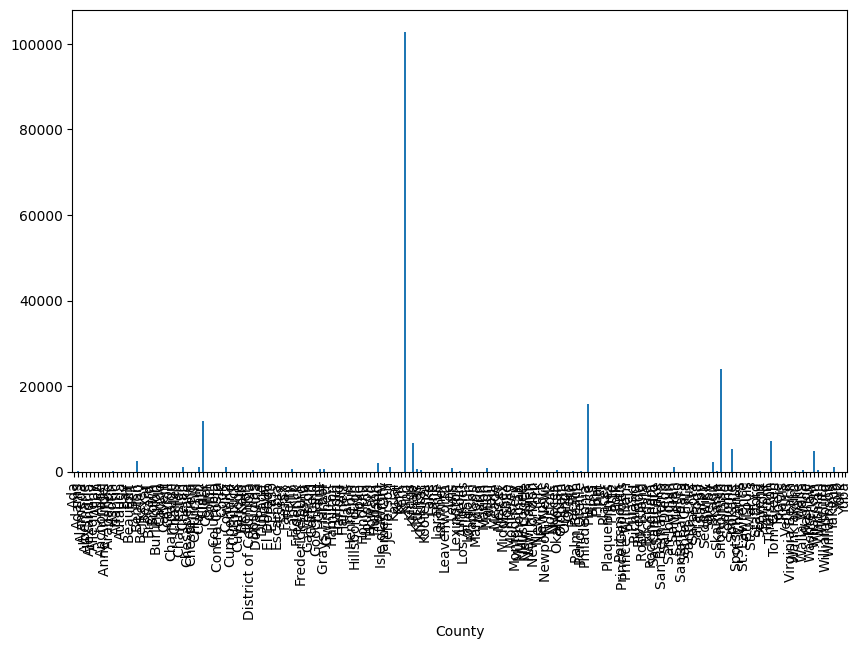

In [10]:

car_per_county = df.groupby("County")['Electric Vehicle Type'].count()
print(car_per_county)
car_per_county.plot(kind='bar', figsize=(10,6))
# plt.xticks(rotation=45, ha='right', fontsize=4)



# plt.title('car distribution across counties')
# plt.xlabel('Counties', fontsize=8)
# plt.ylabel('number of EV')


# plt.tight_layout()
# plt.show()

# Is there a relationship between the model year of vehicles and the likelihood of being plug-in hybrids? How would you approach this analysis?
Approach: Perform a logistic regression or a statistical test (e.g., chi-square) to analyze the relationship between vehicle model year and the likelihood of being a plug-in hybrid.


   VIN (1-10)     County          City State  Postal Code  Model Year    Make        Model                   Electric Vehicle Type Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  Legislative District  DOL Vehicle ID                 Vehicle Location        Electric Utility  2020 Census Tract  elc_label
0  5YJSA1E28K  Snohomish      Mukilteo    WA      98275.0        2019   TESLA      MODEL S          Battery Electric Vehicle (BEV)           Clean Alternative Fuel Vehicle Eligible             270          0                  21.0       236424583     POINT (-122.29943 47.912654)  PUGET SOUND ENERGY INC       5.306104e+10          0
1  1C4JJXP68P     Yakima        Yakima    WA      98901.0        2023    JEEP     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)             Not eligible due to low battery range              21          0                  15.0       249905295  POINT (-120.4688751 46.6046178)              PACIFICORP       5.307700e+10          1
2

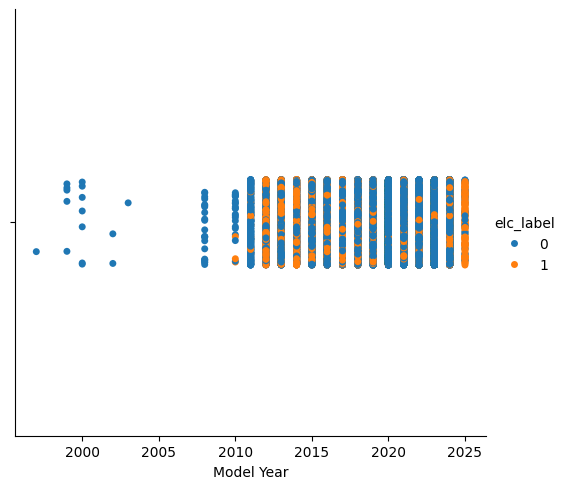

Logestin Regression Accuracy is: 0.78


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Set display options to show all columns and adjust formatting
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Set a wider width for cleaner display

import seaborn as sns

df['elc_label'] = df['Electric Vehicle Type'].apply(lambda x: 1 if x == 'Plug-in Hybrid Electric Vehicle (PHEV)'  else 0)

# df_new = pd.concat([df, df['elc_label']], axis=1) ## this line is not needed
print(df.head(5))
df_type_model = df[['elc_label', 'Model Year']]

#slplit data into feature and target varibabl
x = df[['Model Year']]
y = df['elc_label']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)


# visualize the relationship using seaborn
sns.catplot(data=df_type_model, x='Model Year', hue='elc_label')
plt.show()

## calculate and print model accuracy
accuracy = log_reg.score(x_test, y_test)

print(f'Logestin Regression Accuracy is: {accuracy:.2f}')

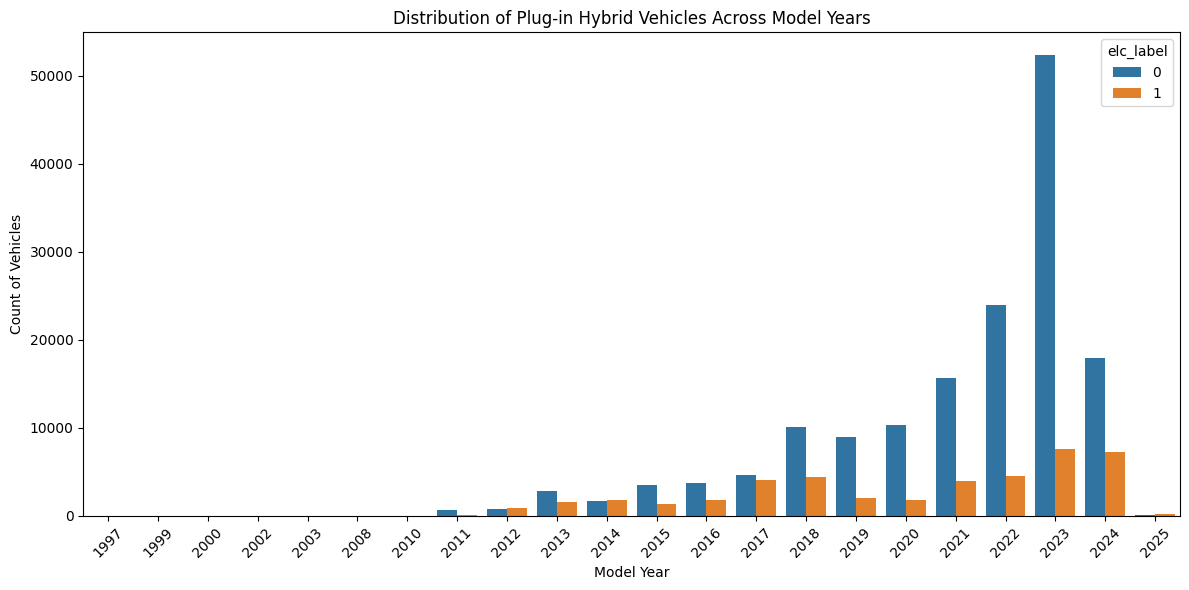

In [12]:

# Visualize the distribution of Plug-in Hybrid Electric Vehicles across Model Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Model Year', hue='elc_label')

# Add labels and title
plt.title('Distribution of Plug-in Hybrid Vehicles Across Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count of Vehicles')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Using this dataset, how would you predict whether a new electric vehicle is a battery electric vehicle (BEV) or a plug-in hybrid electric vehicle (PHEV)?
Objective: Demonstrate predictive modeling and machine learning skills.
Approach: Split the dataset, use features like model year, make, and city to build a classification model (e.g., logistic regression or random forest) to predict the electric vehicle type.


This is classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    125535
           1       0.90      0.82      0.86     34503

    accuracy                           0.94    160038
   macro avg       0.92      0.90      0.91    160038
weighted avg       0.94      0.94      0.94    160038



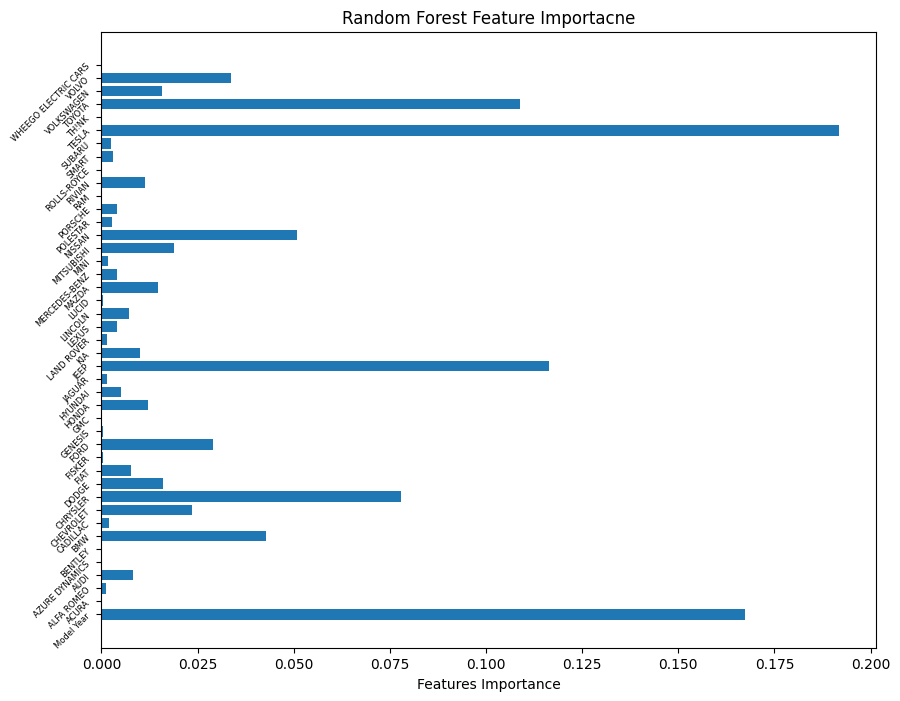

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split

## select relevant feature

x = df[['Model Year', 'Make']]
y = df['elc_label']

## convert categorical variable
# perform one hot encoding on the categorical make featrue

df1 = pd.get_dummies(x['Make'], dtype=int)

x = pd.concat([x, df1], axis=1).reindex(x.index)

## now drop the original column
x = x.drop(columns=['Make'])
x.head()


x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2, random_state=20)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(x_train, y_train)


## evaluate the model
y_pred = rf_model.predict(x_test)

## print a classification report (accuracy, precision, recall, F1 score)

print('This is classification report:\n',classification_report(y_test, y_pred))

## plot the feature importance
importance = rf_model.feature_importances_
features = x.columns


plt.figure(figsize=(10, 8))
plt.barh(features, importance)
plt.xlabel('Features Importance')
plt.yticks(rotation=45, fontsize=6)
plt.title("Random Forest Feature Importacne")
plt.show()


# Model evaluation and improvement
Cross-validation: Perform cross-validation to get a better understanding of how well your model generalizes to unseen data.

In [40]:
from sklearn.model_selection import cross_val_score

## perform 5 fold cross validation.
scores = cross_val_score(rf_model, x, y, cv=5)

print(f'Cross-validation score: {scores}')
print(f'Mean cross-validation score: {scores.mean()}')



Cross-validation score: [0.94348913 0.93796551 0.93934016 0.94341273 0.9400135 ]
Mean cross-validation score: 0.9408442060796256


# Hyperparameter tuning: 
Use RandomizedSearchCV or GridSearchCV to fine-tune the hyperparameters of the Random Forest model for better performance.

In [43]:
from sklearn.model_selection import RandomizedSearchCV

## define hyper parameter grid

param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]             # Whether to use bootstrap samples when building trees
}

## perform random search with cross-validation
random_search = RandomizedSearchCV(rf_model, param_distributions=param_grid, n_iter=50, cv=3, random_state=42)
random_search.fit(x_train, y_train)

print(f'Best hyperparameters: {random_search.best_params_}')

Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}


## now that we have the best hyperparameters as below
Best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}

let's create a new model

In [46]:
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=30,
    bootstrap=False,
    random_state=42
)

# Retrain model on the entire training set
Now, train the newly defined best_rf_model on your entire training set (x_train and y_train).

In [47]:
# train the the model on the training set
best_rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=30, min_samples_split=5,
                       n_estimators=50, random_state=42)

# Evaluate the model on the test set
make predictions on the test set (x_test) and evaluate the performance using metrics like accuracy, precision, recall, or F1-score.

In [48]:
y_pred = best_rf_model.predict(x_test)

# Evaluate the model

from sklearn.metrics import classification_report, accuracy_score

# print classification report for precision, recall, and F1-socre
print('classification report:\n', classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy:.2f}')

classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    125535
           1       0.90      0.82      0.86     34503

    accuracy                           0.94    160038
   macro avg       0.92      0.90      0.91    160038
weighted avg       0.94      0.94      0.94    160038

accuracy: 0.94


# Next Steps to Consider:
Handling Class Imbalance:

In [51]:
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=30,
    bootstrap=False,
    class_weight='balanced',  # Add class_weight to handle imbalance
    random_state=42
)

# Fit the model on the training data
best_rf_model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = best_rf_model.predict(x_test)

# Evaluate the model
print('Classification report:\n', classification_report(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95    125535
           1       0.74      0.96      0.83     34503

    accuracy                           0.92    160038
   macro avg       0.86      0.93      0.89    160038
weighted avg       0.93      0.92      0.92    160038

Accuracy: 0.92


 # Overall Accuracy:
Accuracy: 0.92 (previously 0.94) — The overall accuracy has dropped slightly, but this is expected because the model is now focused on better handling class 1, which is a smaller class.

# compare the two model
A/B testing

In [52]:
from sklearn.metrics import classification_report, accuracy_score

# Model 1: Default Random Forest
default_rf_model = RandomForestClassifier(random_state=42)
default_rf_model.fit(x_train, y_train)
y_pred_default = default_rf_model.predict(x_test)

# Model 2: Random Forest with class_weight='balanced'
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=30,
    bootstrap=False,
    class_weight='balanced',
    random_state=42
)
best_rf_model.fit(x_train, y_train)
y_pred_best = best_rf_model.predict(x_test)

# Evaluate Model 1
print("Model 1 (Default RF) Classification Report:\n", classification_report(y_test, y_pred_default))
accuracy_default = accuracy_score(y_test, y_pred_default)
print(f"Model 1 Accuracy: {accuracy_default:.2f}\n")

# Evaluate Model 2
print("Model 2 (RF with class_weight='balanced') Classification Report:\n", classification_report(y_test, y_pred_best))
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Model 2 Accuracy: {accuracy_best:.2f}\n")

Model 1 (Default RF) Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    125535
           1       0.90      0.82      0.86     34503

    accuracy                           0.94    160038
   macro avg       0.92      0.90      0.91    160038
weighted avg       0.94      0.94      0.94    160038

Model 1 Accuracy: 0.94

Model 2 (RF with class_weight='balanced') Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95    125535
           1       0.74      0.96      0.83     34503

    accuracy                           0.92    160038
   macro avg       0.86      0.93      0.89    160038
weighted avg       0.93      0.92      0.92    160038

Model 2 Accuracy: 0.92



# Perform Statistical Testing (Optional)
To further validate the comparison between the two models, you can perform statistical testing. A common test is the McNemar’s Test, which checks whether the differences in predictions between two models are statistically significant.
If the p-value is below a threshold (e.g., 0.05), it suggests that there is a statistically significant difference between the two models.

In [54]:
from statsmodels.stats.contingency_tables import mcnemar
import numpy as np

# Create a contingency table (2x2) based on model predictions
contingency_table = np.zeros((2, 2))

for y_true, y_pred1, y_pred2 in zip(y_test, y_pred_default, y_pred_best):
    if y_pred1 == y_true and y_pred2 == y_true:
        contingency_table[0, 0] += 1  # Both models correct
    elif y_pred1 == y_true and y_pred2 != y_true:
        contingency_table[0, 1] += 1  # Model 1 correct, Model 2 wrong
    elif y_pred1 != y_true and y_pred2 == y_true:
        contingency_table[1, 0] += 1  # Model 2 correct, Model 1 wrong
    else:
        contingency_table[1, 1] += 1  # Both models wrong

# Perform McNemar's Test
result = mcnemar(contingency_table, exact=True)
print(f"McNemar's Test statistic: {result.statistic}, p-value: {result.pvalue}")


McNemar's Test statistic: 4692.0, p-value: 1.5909428956480028e-218


Test Statistic: 4692.0: This is the test statistic value, which indicates the degree of difference between the predictions of the two models (Model 1 and Model 2). A large test statistic generally points to a more significant difference between the models.

P-value: 1.59e-218: This is the p-value, which tells us whether the difference between the models is statistically significant. The value 1.59e-218 (which is extremely small) is essentially zero. When the p-value is very low (typically below a threshold like 0.05 or 0.01), it means that the difference between the two models is statistically significant.

What To Do Next:
Choose Based on Business Goals: Now that you know the two models are statistically different, you can decide which one to use based on the performance metrics that align with your goals (e.g., accuracy, recall, precision, F1-score).
If identifying class 1 (PHEV) correctly is more important (i.e., you need higher recall for class 1), the model with class_weight='balanced' is probably the better choice.
If you care more about overall accuracy or precision for class 0, the default model might be better.